# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 2 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, лапласа и коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [3]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

norm_samples = norm_distr.rvs(N) 
laplacian_samples = laplacian_distr.rvs(N)
cauchy_samples = cauchy_distr.rvs(N)

Постройте график плотности распределения для всех трех распределений на одних осях.

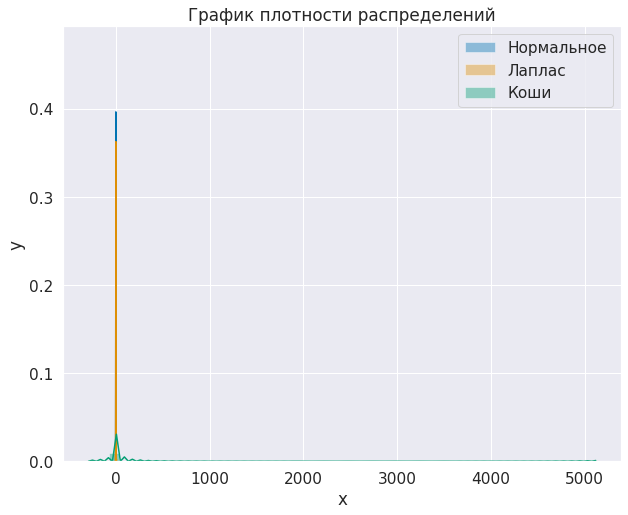

In [4]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('График плотности распределений')

sns.distplot(norm_samples, color = color_for_normal, label = 'Нормальное')
sns.distplot(laplacian_samples, color = color_for_laplace, label = 'Лаплас')
sns.distplot(cauchy_samples, color = color_for_cauchy, label = 'Коши')
plt.ylabel(r'y')
plt.xlabel(r'x')
plt.legend()
plt.show()

оставим такой некрасивый график, чтобы продемонстрировать, что есть существенные выбросы в распределении Коши.

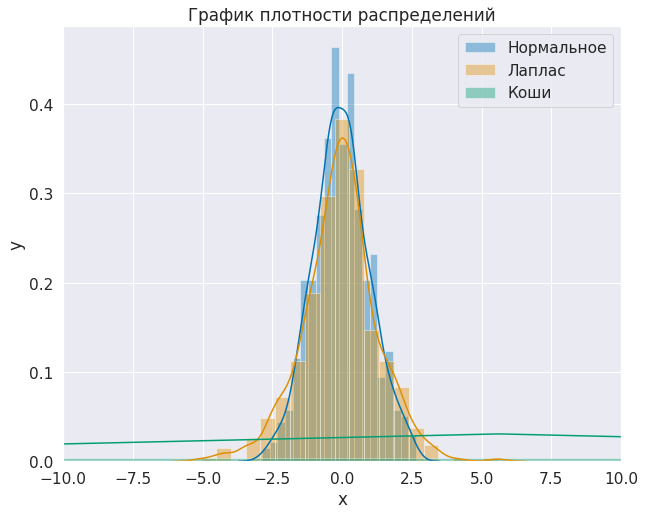

In [5]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('График плотности распределений')

sns.distplot(norm_samples, bins = 20,color = color_for_normal, label = 'Нормальное')
sns.distplot(laplacian_samples, bins = 20,color = color_for_laplace, label = 'Лаплас')
sns.distplot(cauchy_samples, bins = 20,color = color_for_cauchy, label = 'Коши')
plt.ylabel(r'y')
plt.xlabel(r'x')
plt.xlim(-10, 10)
plt.legend()
plt.show()

На этой диаграмме в силу нормировки плотности распределения получаем не очень информативный график распределения Коши(опять же из-за выбросов).

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** очевидно, для распределения Коши , так как оно имеет много выбросов. Дело в том, что небольшая дельта в для угла в близи точки $\frac{\pi}{2}$ даёт огромный разброс для значений выборки. Поэтому для него лучше использовать медиану.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [6]:
import math

def truncated_mean(samples, alpha=0.3):
    if len(samples) == 1:
        return samples[0]
    sort_samples = np.sort(samples)
    len_samples = sort_samples.shape[0]
    return np.average(sort_samples[int(alpha * len_samples) :int((1 - alpha) * len_samples )])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [7]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    f_x = lambda x : x**2 * distr.pdf(x)
    u1_alpha = distr.ppf(1-alpha)
    integr = quad(f_x, 0, u1_alpha)[0]
    
    return 2 * (integr + alpha * (u1_alpha)**2)/(1 - 2 * alpha)**2

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

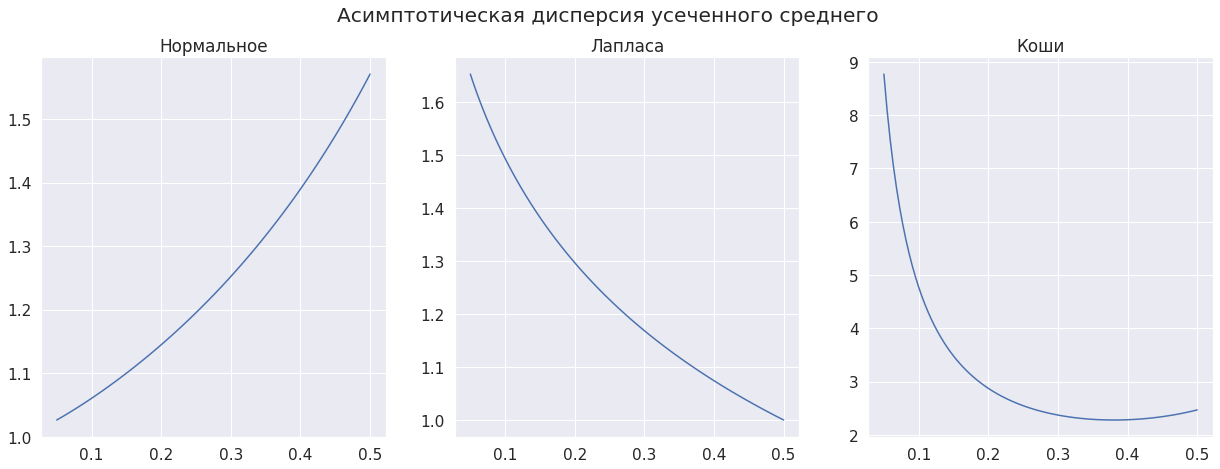

In [8]:
alpha_grid = np.linspace(0.05, 0.49999, 100)
fig, ax_array = plt.subplots(1, 3, figsize=(21,7))

asym_var_aver_array =[[asymp_var(norm_distr, alpha) for alpha in alpha_grid],
                      [asymp_var(laplacian_distr, alpha) for alpha in alpha_grid],
                      [asymp_var(cauchy_distr, alpha) for alpha in alpha_grid]] 
title_array = ['Нормальное', 'Лапласа', 'Коши']

fig.suptitle('Асимптотическая дисперсия усеченного среднего')
for ax, var, title in zip(ax_array, asym_var_aver_array, title_array):
    ax.set_title(title)
    ax.plot(alpha_grid, var)

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** При $\alpha = 0$ получим обычное математическое оиждание, при $\alpha = 0.5$ получим медиану. Сходу можно отметить, что почти в силу отсуствия хвостов у нормального распределния(самые тяжелые , правило трех сигм и тд)  для него лучше использовать среднее значение, в отличии от медианы(хоть разница и незначительна, скорее из-за шума, так как в идеале они должны совпадать). Для распределения Лапласа хвосты уже дают о себе знать и поэтому лучше использовать медиану, хотя разнциа опять же незначительная. Чего не скажешь для распределения Коши.Найдем при каком альфа будет минимальная дисперсия:

In [9]:
alpha_grid[np.argmin([asymp_var(cauchy_distr, alpha) for alpha in alpha_grid])]

0.3818108080808081

То есть как видно эмпирически лучше усреднить элементы находящиеся в альфа окрестности среднего. Но погрешнсоть в дисперсии будет совсем незначительная :

In [10]:
asymp_var(cauchy_distr, 0.49999) - asymp_var(cauchy_distr, 0.38181)

0.1896936537415952

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [11]:
# постоянно сортировать будет :(
def cum_mediana(samples):
    return np.array([np.median(samples[:i]) for i in range(1,len(samples)+1)])
def cum_average(samples):
    array_n = np.arange(0, samples.shape[0])
    array_n[0] = 1
    return np.cumsum(samples)/array_n
def cum_truncated_mean(samples, alpha):
    return np.array([truncated_mean(samples[:i]) for i in range(1,len(samples)+1)])

In [12]:
estimate_for_norm = (cum_average(norm_samples), 
                     cum_truncated_mean(norm_samples, 0.35), 
                     cum_mediana(norm_samples))
estimate_for_lapl = (cum_average(laplacian_samples), 
                     cum_truncated_mean(laplacian_samples, 0.35), 
                     cum_mediana(laplacian_samples))
estimate_for_cauc = (cum_average(cauchy_samples), 
                     cum_truncated_mean(cauchy_samples, 0.35), 
                     cum_mediana(cauchy_samples))

label_array = ['Среднее', r'Усеченное среднее $\alpha = 0.35$', 'Медиана']
format_line_array = ["", "--", ":"]

**Нормальное распределение**

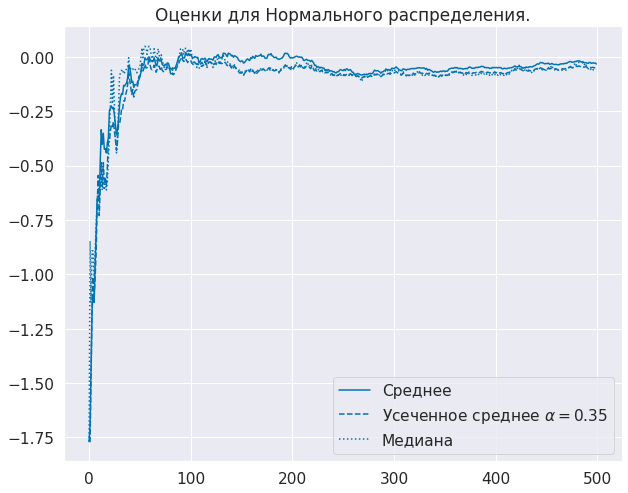

In [13]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('Оценки для Нормального распределения.')
for estimate, label, fmt in zip(estimate_for_norm, label_array, format_line_array):
    plt.plot(np.arange(0,len(estimate)), estimate, fmt, c = color_for_normal, label  = label)
plt.legend()
plt.show()

**Распределение Лапласа**

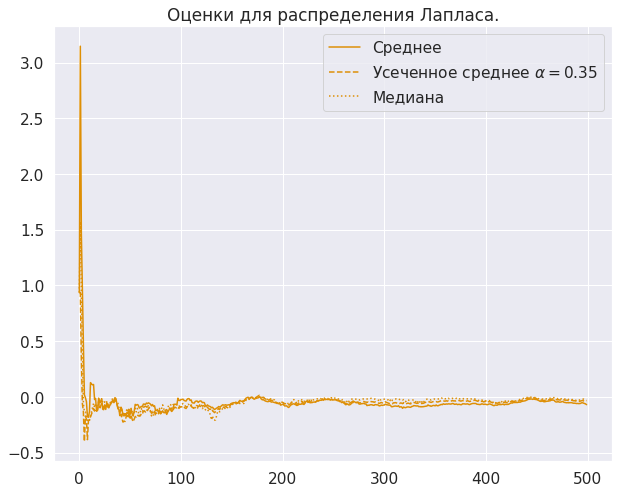

In [14]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('Оценки для распределения Лапласа.')
for estimate, label, fmt in zip(estimate_for_lapl, label_array, format_line_array):
    plt.plot(np.arange(0,len(estimate)), estimate, fmt, c = color_for_laplace, label  = label)
plt.legend()
plt.show()

**Распределение Коши**

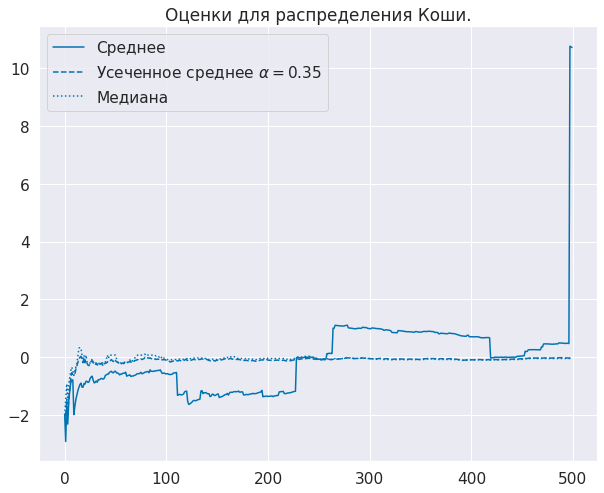

In [15]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('Оценки для распределения Коши.')
for estimate, label, fmt in zip(estimate_for_cauc, label_array, format_line_array):
    plt.plot(np.arange(0,len(estimate)), estimate, fmt, c = color_for_normal, label  = label)
plt.legend()
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** Видно что в целом поведение оценок для Нормального и Лапласова распределения не сильно отличаются с ростом n. Для распределения Коши наиболее устойчиво ведёт себя медиана и усеченное среднее , а вот стандартное среднее по всей выборки сильно скачет, как раз из-за выбросов.

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [16]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /home/sergey/Stat/winequality-red.csv
100%|████████████████████████████████████████| 101k/101k [00:00<00:00, 3.00MB/s]


In [17]:
import pandas as pd

In [18]:
data = pd.read_csv("winequality-red.csv")

In [19]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [20]:
f_x = lambda x: "low alcohol" if x <= 10 else "medium alcohol" if  10 < x <= 12 else "high alcohol" 
data['category'] = data["alcohol"].apply(f_x)

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

Посмотрим на количество.

In [21]:
print(sum(data['category'] == "low alcohol"))
print(sum(data['category'] == "medium alcohol"))
print(sum(data['category'] == "high alcohol"))

747
711
141


In [22]:
avarage_for_all = np.average(data["residual sugar"])

average_for_low  = np.average(data["residual sugar"][data['category'] == "low alcohol"])
mediana_for_low = np.median(data["residual sugar"][data['category'] == "low alcohol"])

average_for_medium  = np.average(data["residual sugar"][data['category'] == "medium alcohol"])
mediana_for_medium = np.median(data["residual sugar"][data['category'] == "medium alcohol"])

average_for_high  = np.average(data["residual sugar"][data['category'] == "high alcohol"])
mediana_for_high = np.median(data["residual sugar"][data['category'] == "high alcohol"])

In [23]:
pd.DataFrame({'average' : [average_for_low, average_for_medium, average_for_high],
              'mediana' : [mediana_for_low, mediana_for_medium, mediana_for_high]},
             index =  ['low alcohol', 'medium alcohol' , 'high alcohol'])

,average,mediana
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2
high alcohol,2.760993,2.3


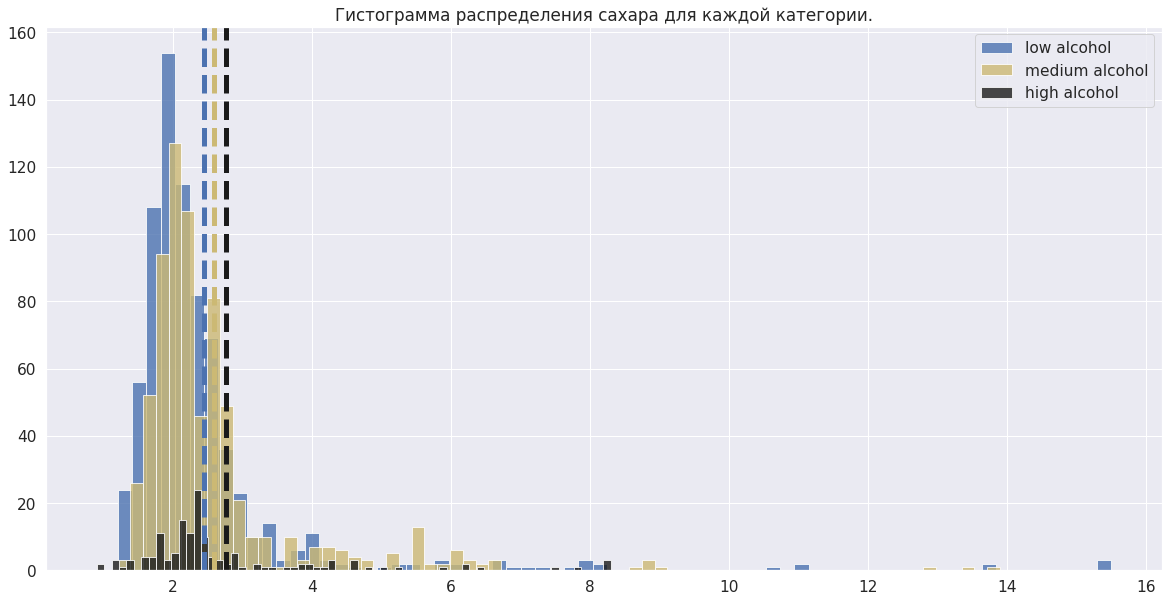

In [24]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(20,10))
plt.title('Гистограмма распределения сахара для каждой категории.')

plt.hist(data["residual sugar"][data['category'] == "low alcohol"], color = 'b', alpha = 0.8, bins = 69, label  = "low alcohol")
plt.axvline(average_for_low, linestyle = '--', linewidth = 5 ,c = 'b')
plt.hist(data["residual sugar"][data['category'] == "medium alcohol"], color = 'y', alpha = 0.8, bins = 69, label  = "medium alcohol")
plt.axvline(average_for_medium, linestyle = '--', linewidth = 5 ,c = 'y')
plt.hist(data["residual sugar"][data['category'] == "high alcohol"], color = 'k',alpha = 0.8, bins = 69, label  = "high alcohol")
plt.axvline(average_for_high, linestyle = '--', linewidth = 5 ,c = 'k')

plt.legend()
plt.show()

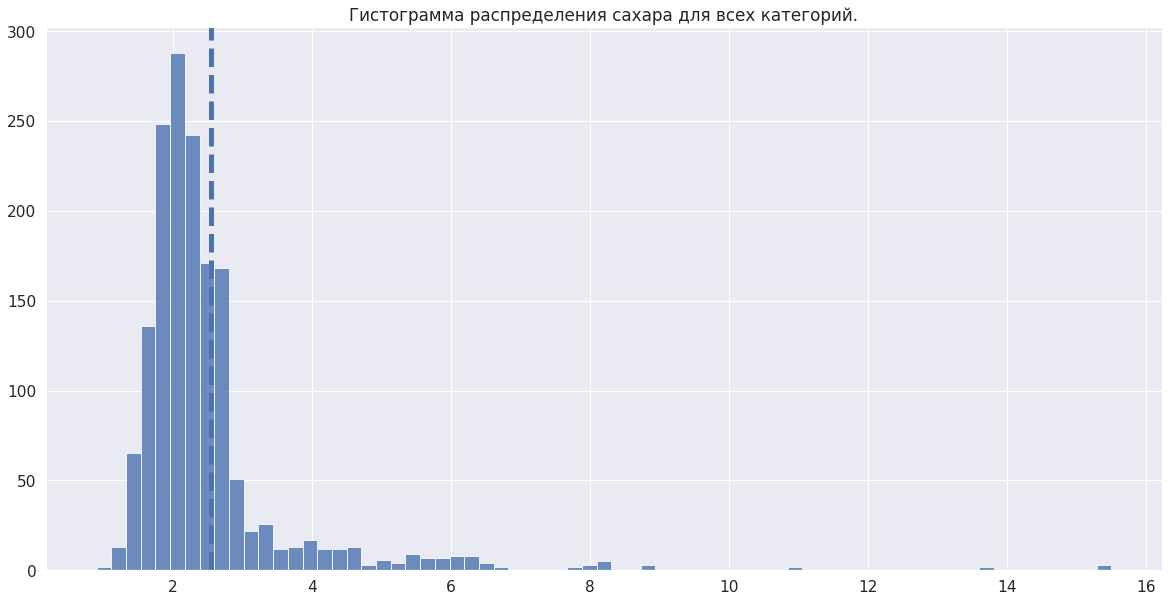

In [25]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(20,10))
plt.title('Гистограмма распределения сахара для всех категорий.')

plt.hist(data["residual sugar"], alpha = 0.8, bins = 69)
plt.axvline(avarage_for_all , linestyle = '--', linewidth = 5)

plt.show()

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Для начала стоит отметить, что чем крепче алкоголь тем больше в нём остаточного сахара). А что касается распределния , то оно напоминает распределение Пуассона из-за своего тяжелошго хвоста справа.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

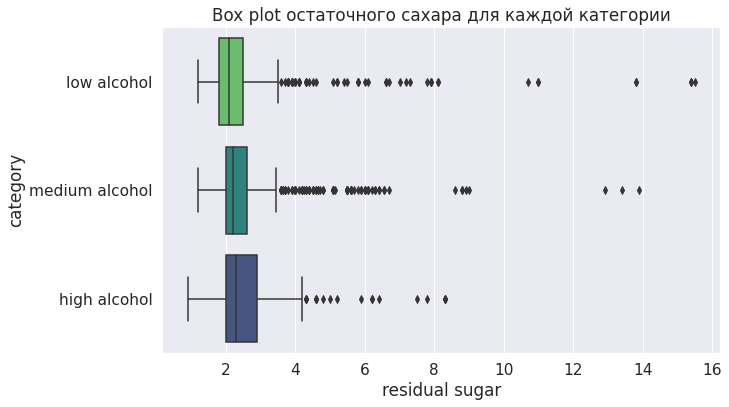

In [26]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Box plot остаточного сахара для каждой категории")
sns.boxplot(x=data["residual sugar"], y=data['category'], palette=palette)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:**  Из-за большого количества выбросов лучше использовать среднее значение.( Может ли выбросов будет больше 10 процентов, стоит ли их учитывать в оценке ? )

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.(странно поставлена задача)

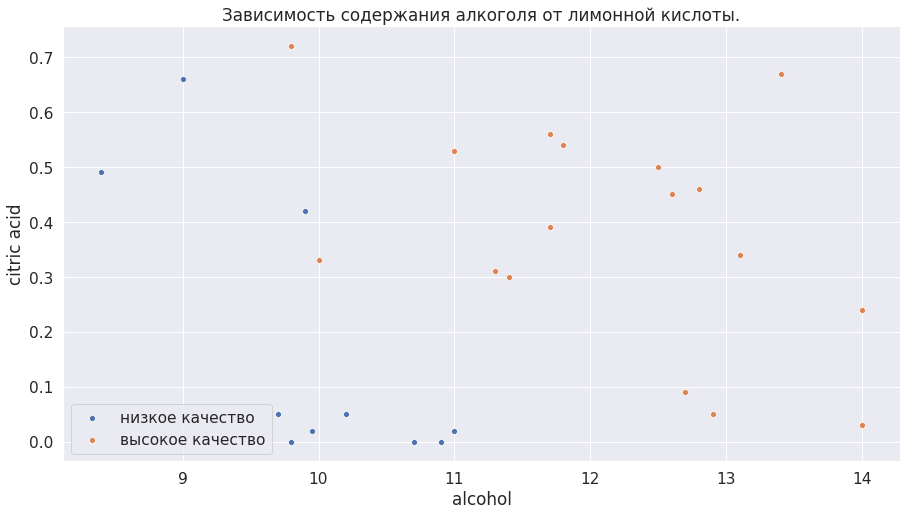

In [28]:
palette=[palette[0]]+[palette[-1]]
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(15,8))
plt.title('Зависимость содержания алкоголя от лимонной кислоты.')

sns.scatterplot(data[data['quality'] == 3]["alcohol"], data[data['quality'] == 3]["citric acid"], label = 'низкое качество')
sns.scatterplot(data[data['quality'] == 8]["alcohol"], data[data['quality'] == 8]["citric acid"], label = 'высокое качество')

plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [51]:
def multivar_for_sampl(distr, samples_vector):
    cov = np.cov(samples_vector)
    mean = np.average(samples_vector, axis = 1)
    return cov, mean

In [64]:
from scipy.stats import multivariate_normal

citric_low = np.array(data[data['quality'] == 3]["citric acid"])
citric_high = np.array(data[data['quality'] == 8]["citric acid"])
alco_low = np.array(data[data['quality'] == 3]["alcohol"])
alco_high = np.array(data[data['quality'] == 8]["alcohol"])

low_cov = np.cov(np.stack((citric_low, alco_low)))
low_mean = np.average(np.stack((citric_low, alco_low)), axis = 1)

high_cov = np.cov(np.stack((citric_high, alco_high)))
high_mean = np.average(np.stack((citric_high, alco_high)), axis = 1)

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [65]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [ ]:
##

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** У низкокачественного вина малое содержание алкоголя. 

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

Из теории известно, что Информация Фишера равна $I_n(\theta)\ =\ \frac{n}{\theta(1-\theta)}$ эффективная оценка достигается при $\hat{\theta}\ =\ \overline X$. 

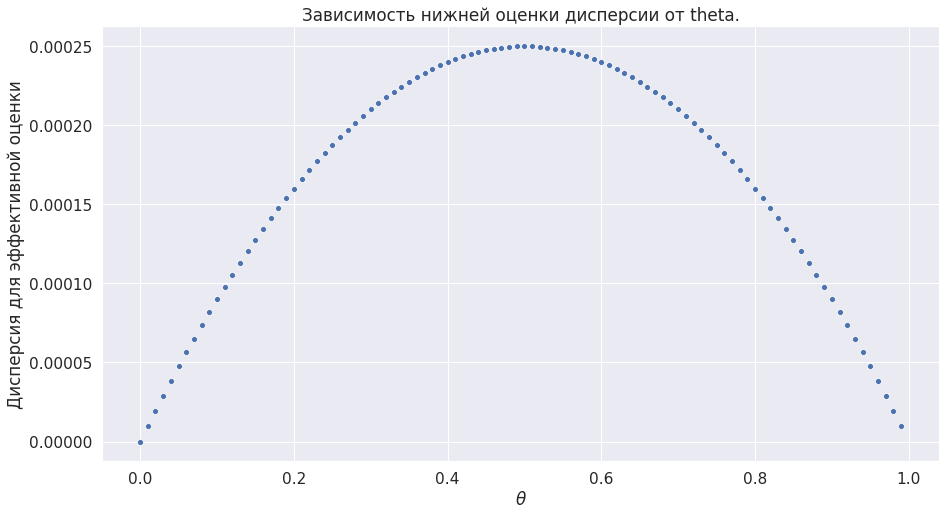

In [39]:
N = 1000
theta_array = np.arange(0,1,0.01)
one_minus_theta = 1 - theta_array
inv_inf_fish = theta_array * one_minus_theta/N


sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(15,8))
plt.title('Зависимость нижней оценки дисперсии от theta.')
sns.scatterplot(theta_array, inv_inf_fish)
plt.ylabel('Дисперсия для эффективной оценки')
plt.xlabel(r'$\theta$')
plt.show()

**Вывод** : лучше оценивать параметр $\theta$ для нечестной монеты. Тогда дисперсия оценки будет меньше , чем для честной.

 Для каждого значения $\theta$
    (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$,
    посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии
    (количество бутстрепных выборок равно $1000$) этой
    эффективной оценки $\theta$.

In [40]:
def get_k_bootstrap_samples(samples_len_k):
    k = len(samples_len_k)
    matrix_ind = np.random.randint(0,k, (k,k))
    return samples_len_k[matrix_ind]

In [41]:
def boostrap_mean(k,samples): # для каждой выборки 
    bootstrap_matrix = get_k_bootstrap_samples(np.squeeze(samples[np.random.randint(0,len(samples),(1,k))]))
    array_mean = np.apply_along_axis(np.average, 1,bootstrap_matrix)
    return np.std(array_mean)

In [42]:
array_var_thete_tilda = [boostrap_mean(1000, sps.bernoulli(p = theta).rvs(N)) for theta in theta_array]

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

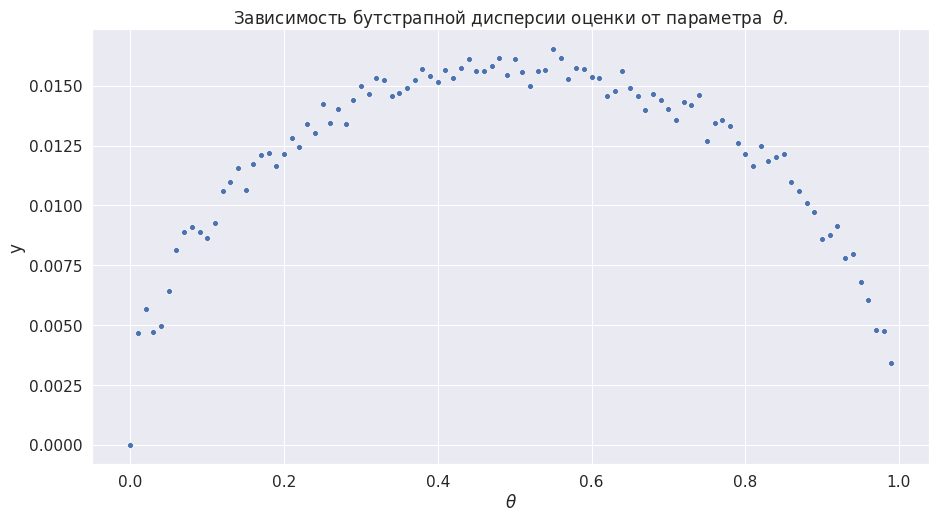

In [46]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(15,8))
plt.title(r'Зависимость бутстрапной дисперсии оценки от параметра  $\theta$.')
sns.scatterplot(theta_array, array_var_thete_tilda)
plt.ylabel('y')
plt.xlabel(r'$\theta$')
plt.show()

**Вывод** на первом графики мы оценили как зависит теоретическая дисперсия (не всегда её можно посчитать!!) в зависимости от параметра $\theta$. На втором графики с помощью метода бустрап мы получили такую же зависимость (не считая шум). Таким образом мы проверили на практике, что бустрап отличный инструмент для оценивания дисперсии наших параметров в случае, когда мы ничего не знаем про нашу выборку.